In [16]:
import cv2
import torch
from PIL import Image
from IPython.display import display

use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(f'CUDA enabled: {use_cuda}')

CUDA enabled: True


In [62]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')
model = model.to(device)

Using cache found in /home/mihawb/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2023-12-10 Python-3.11.5 torch-2.1.0+cu118 CUDA:0 (NVIDIA GeForce GTX 1050, 1997MiB)

100%|██████████| 14.1M/14.1M [00:01<00:00, 11.9MB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


: 

100%|██████████| 165k/165k [00:00<00:00, 826kB/s]
100%|██████████| 476k/476k [00:00<00:00, 4.99MB/s]


(100, 56)

(75, 100)

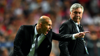

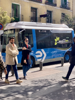

In [56]:
MAX_SIZE = (100, 100)
for f in 'zidane.jpg', 'bus.jpg':
    torch.hub.download_url_to_file('https://ultralytics.com/images/' + f, f)
im1 = Image.open('zidane.jpg')
im1.thumbnail(MAX_SIZE)
im2 = Image.open('bus.jpg')
im2.thumbnail(MAX_SIZE)

display(im1.size, im2.size)
display(im1)
display(im2)

In [59]:
results = model([im1, im2], size=MAX_SIZE[0])  # batch of images

# Results
results.print()
results.save()

results.xyxy[1]  # im1 predictions (tensor)
results.pandas().xyxy[1]  # im1 predictions (pandas)

image 1/2: 56x100 3 persons
image 2/2: 100x75 4 persons, 1 bus
Speed: 5.9ms pre-process, 2.9ms inference, 1.1ms NMS per image at shape (2, 3, 128, 128)
Saved 2 images to runs/detect/exp7


,xmin,ymin,xmax,ymax,confidence,class,name
0,3.329101,37.037266,19.835762,84.174538,0.779521,0,person
1,61.541199,33.347248,74.823868,79.979156,0.590797,0,person
2,19.825108,33.919270,32.524075,70.244461,0.546925,0,person
3,0.769070,21.465696,74.302910,67.425400,0.428927,5,bus
4,2.633303,21.787601,73.369011,70.180466,0.263674,0,person
